In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

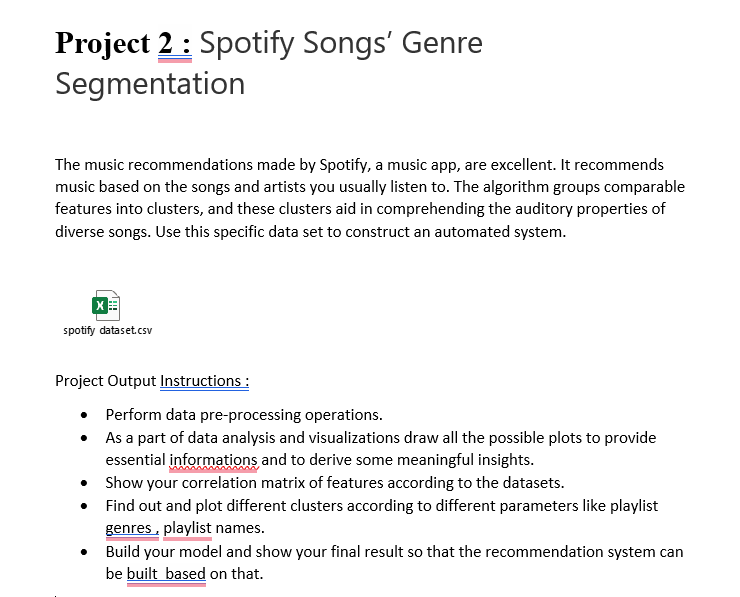

In [27]:
data = pd.read_csv("spotify dataset.csv")

# **DATA PRE PROCESSING**

In [28]:
print(data.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [29]:
print(data.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [30]:
data.dropna(inplace=True) 

In [31]:
label_encoder = LabelEncoder()
data['playlist_genre'] = label_encoder.fit_transform(data['playlist_genre'])
data['playlist_subgenre'] = label_encoder.fit_transform(data['playlist_subgenre'])

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id'], axis=1))

In [33]:
scaled_data = pd.DataFrame(scaled_features, columns=data.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id'], axis=1).columns)

# **Data Analysis and Visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

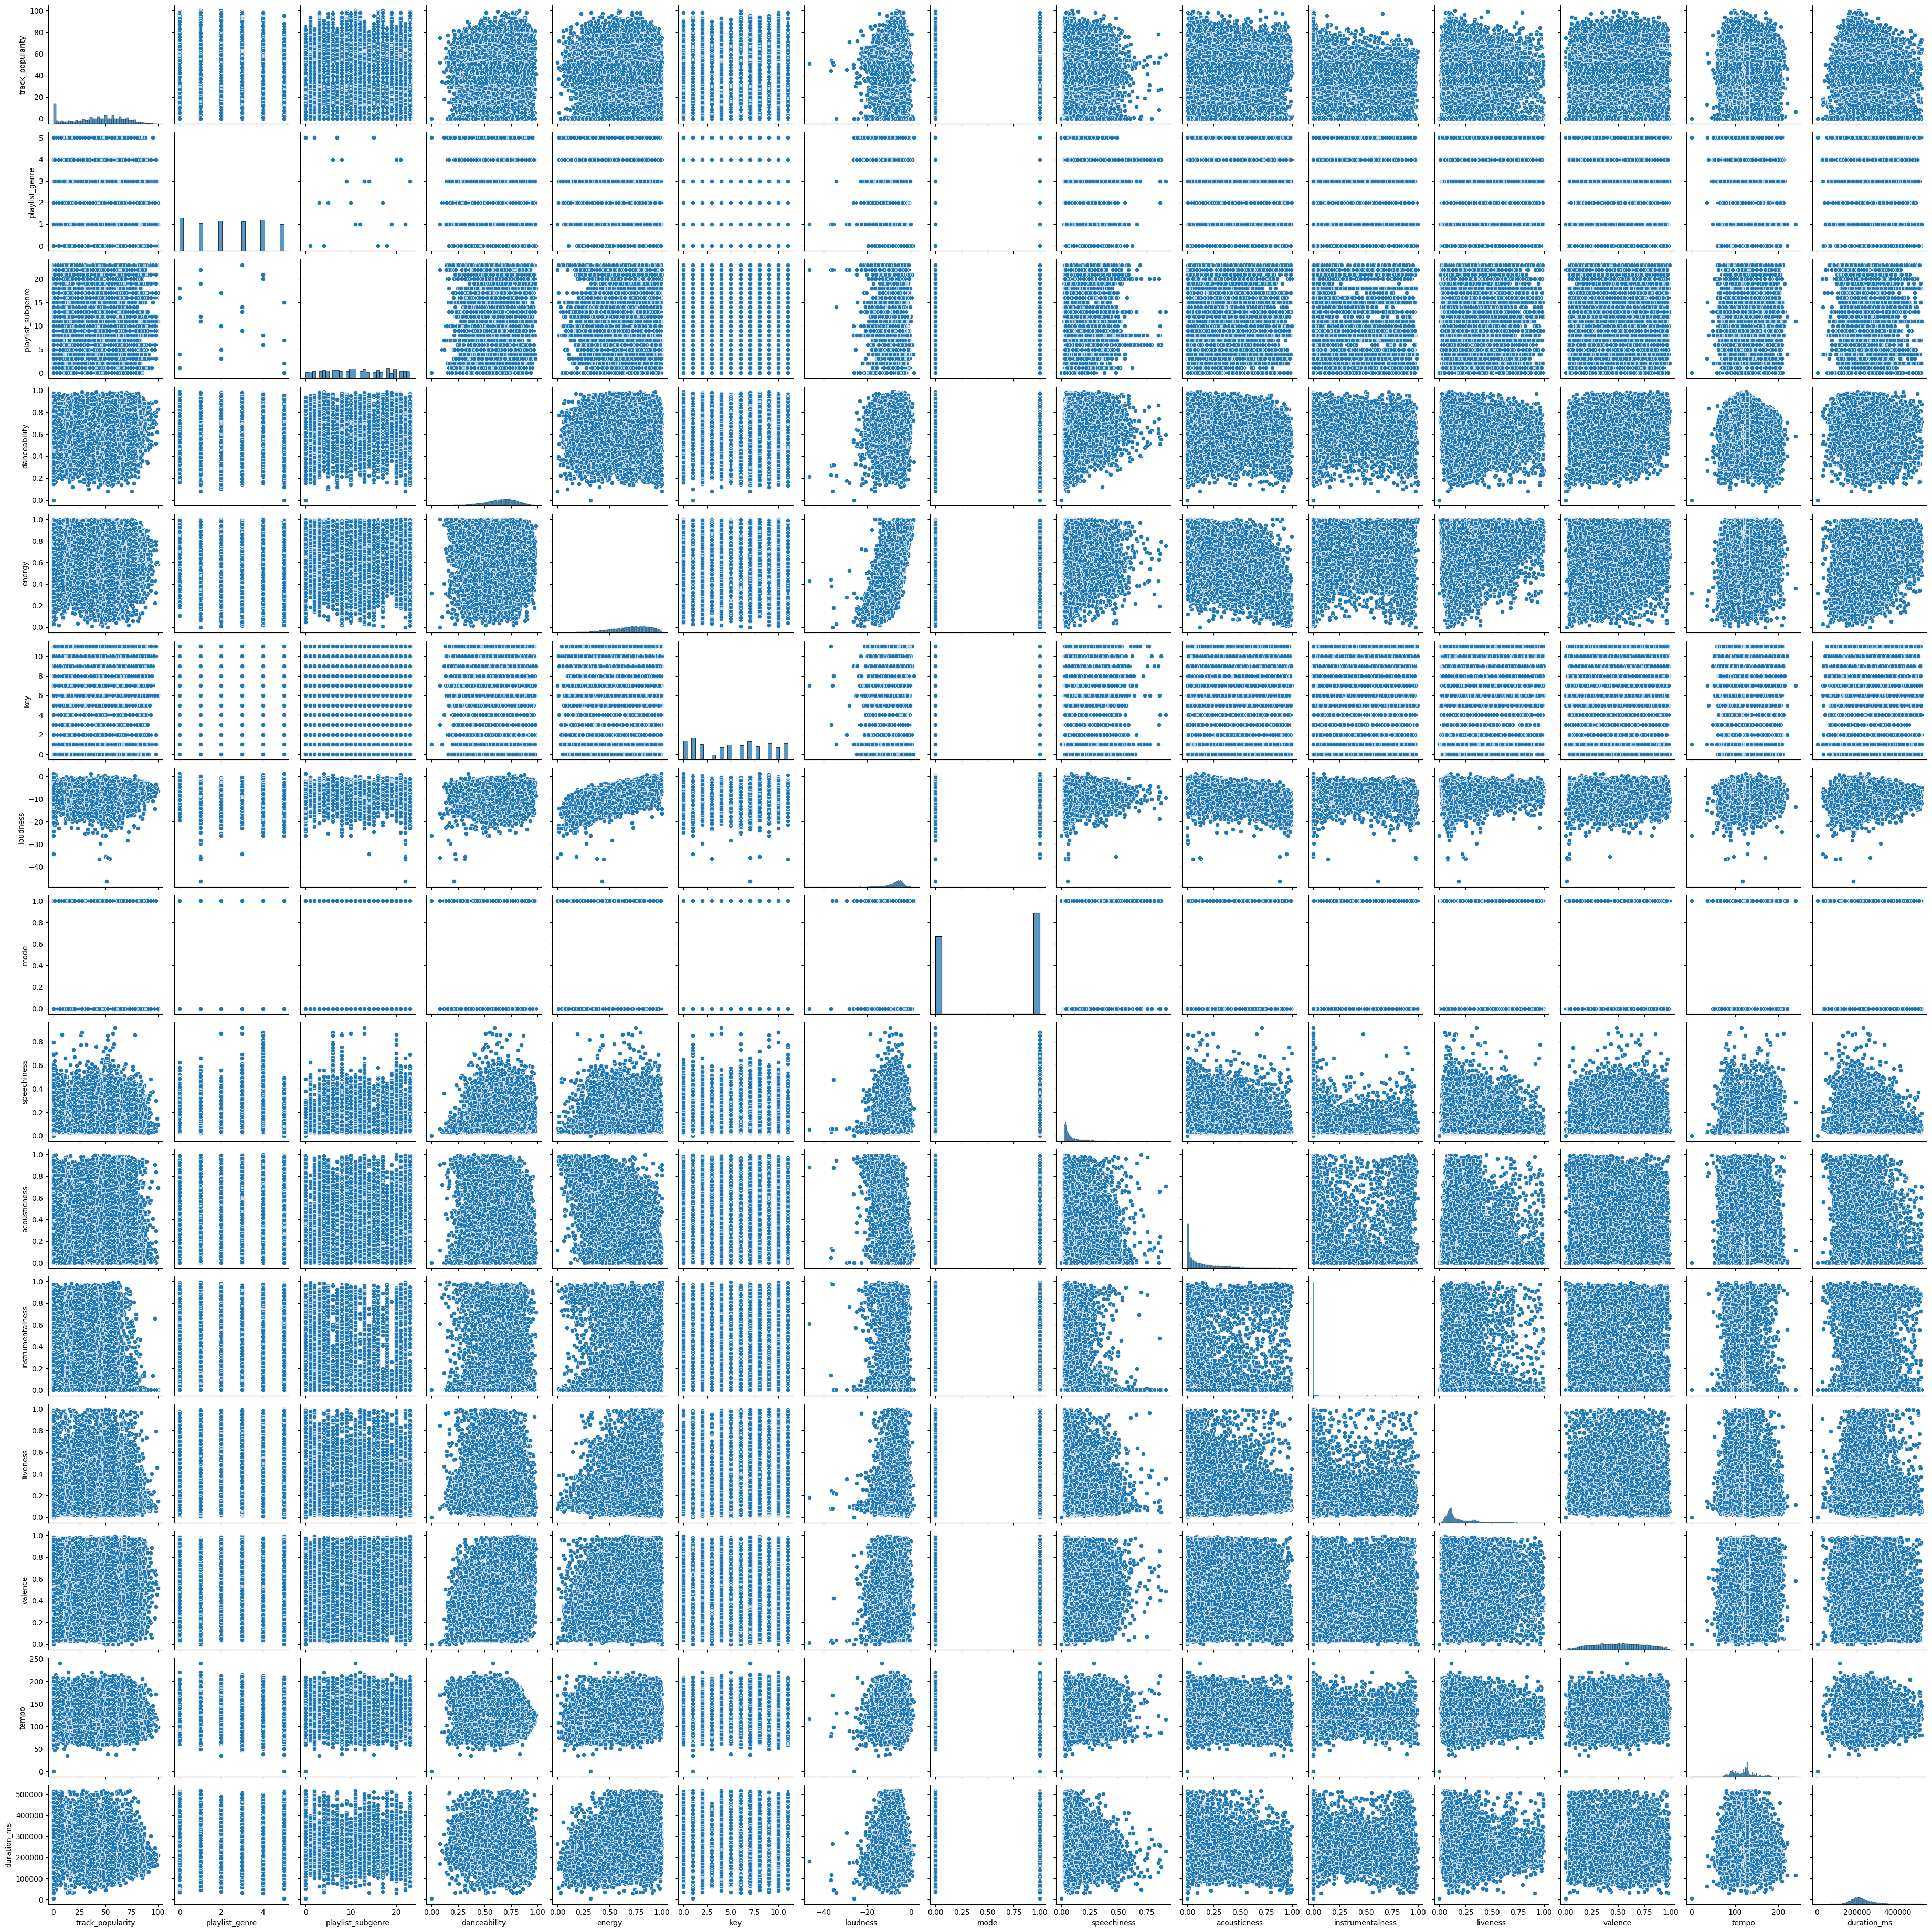

In [34]:
sns.pairplot(data)
plt.show()

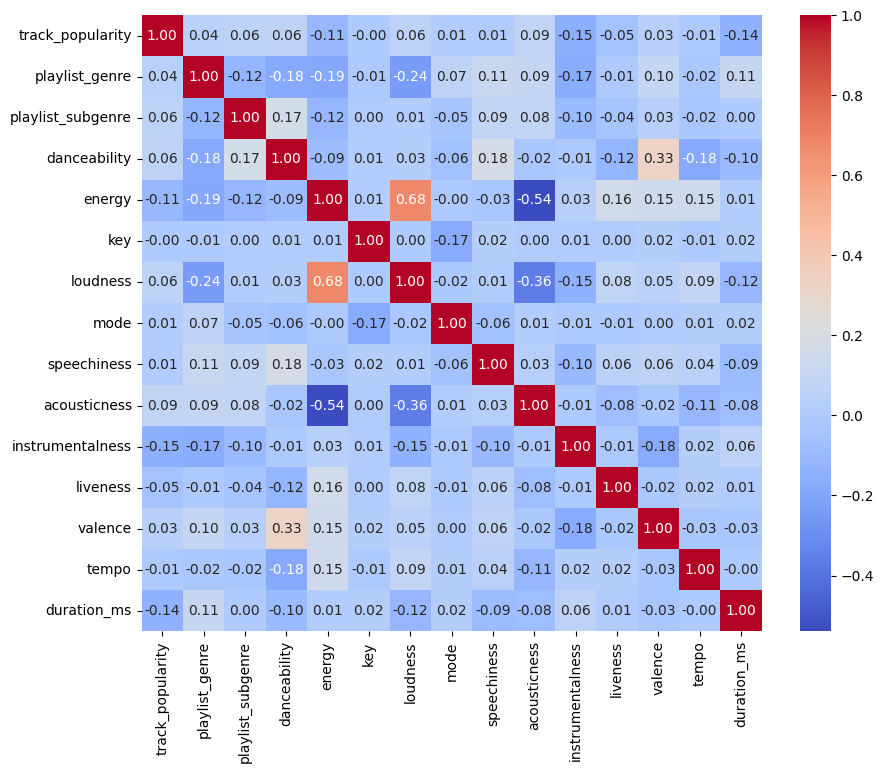

In [35]:
numeric_data = data.select_dtypes(include=np.number)  
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  
plt.show()

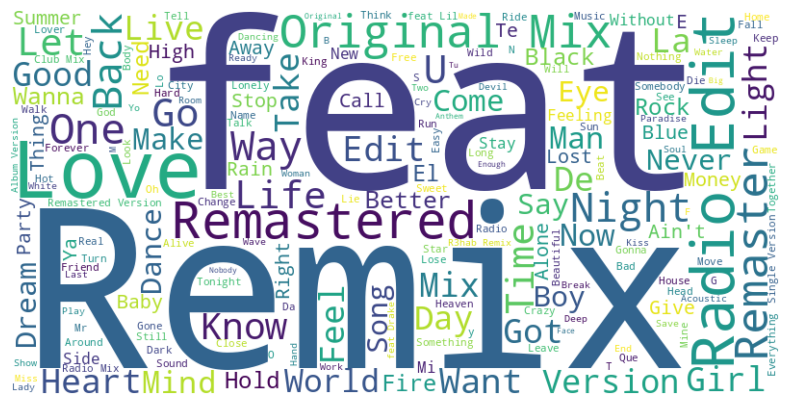

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_data = " ".join(data['track_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


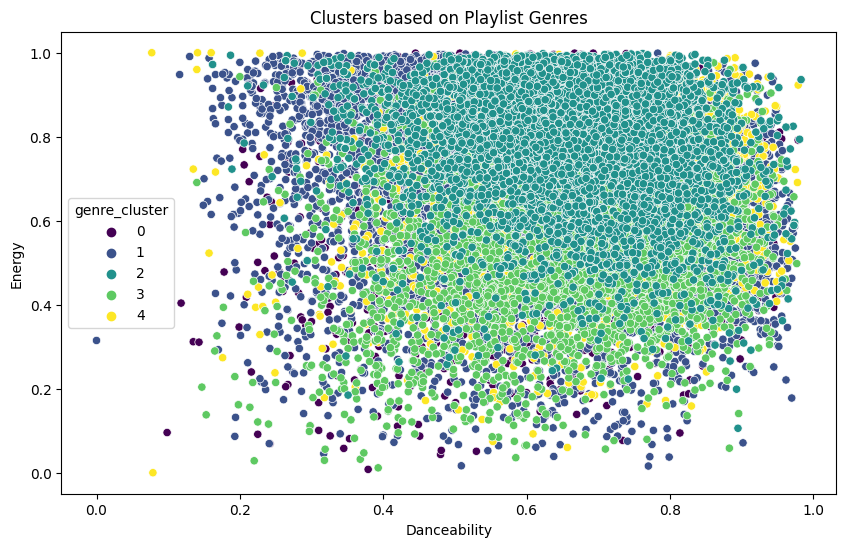

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data[['playlist_genre']])
data['genre_cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='danceability', y='energy', hue='genre_cluster', palette='viridis')
plt.title('Clusters based on Playlist Genres')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


In [37]:
from sklearn.metrics import silhouette_score
kmeans.fit(scaled_data[['playlist_genre']])
data['genre_cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data[['playlist_genre']], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.8784992356375517


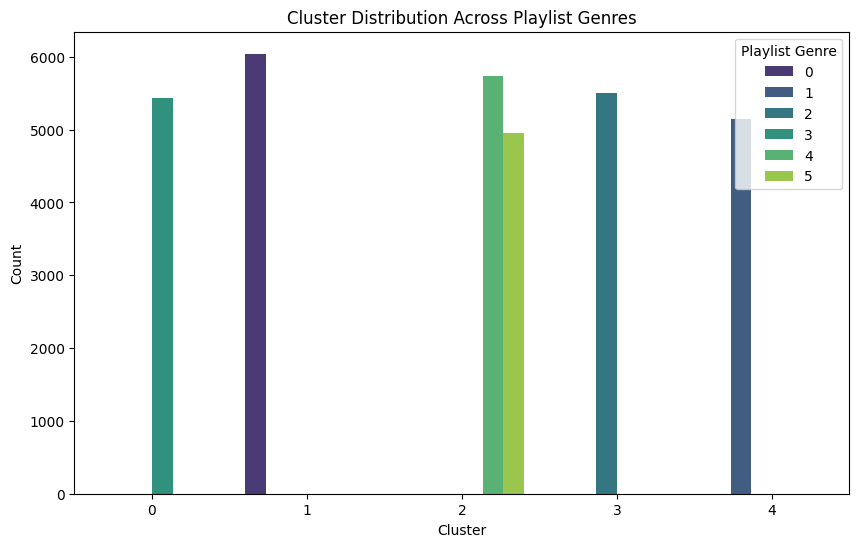

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='genre_cluster', hue='playlist_genre', palette='viridis')
plt.title('Cluster Distribution Across Playlist Genres')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Playlist Genre', loc='upper right')
plt.show()

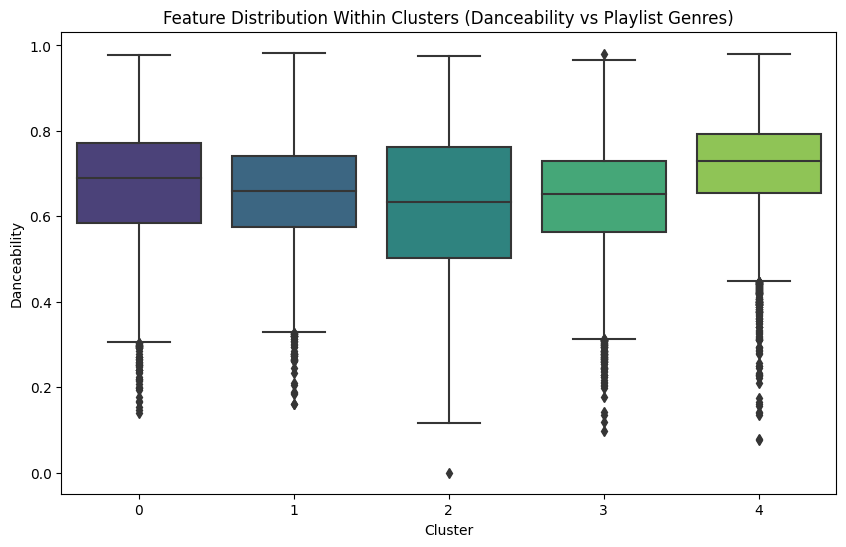

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='genre_cluster', y='danceability', palette='viridis')
plt.title('Feature Distribution Within Clusters (Danceability vs Playlist Genres)')
plt.xlabel('Cluster')
plt.ylabel('Danceability')
plt.show()

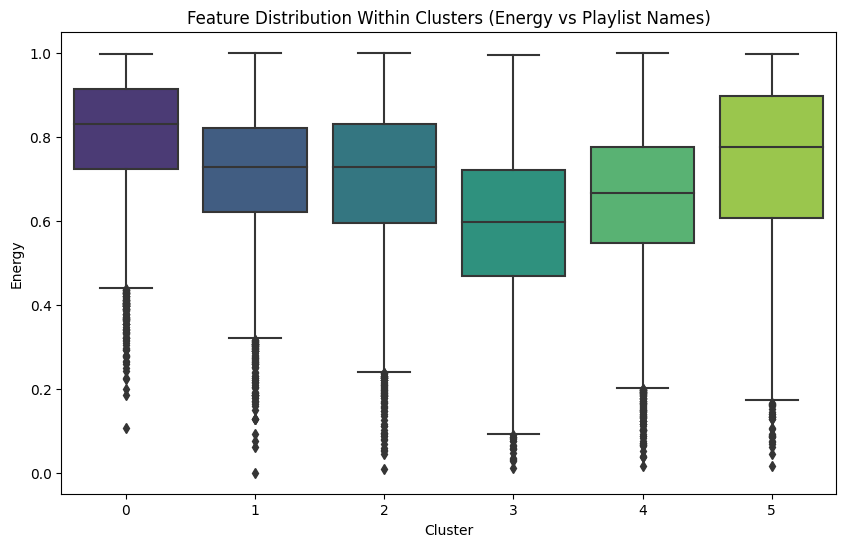

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='playlist_genre', y='energy', palette='viridis')
plt.title('Feature Distribution Within Clusters (Energy vs Playlist Names)')
plt.xlabel('Cluster')
plt.ylabel('Energy')
plt.show()

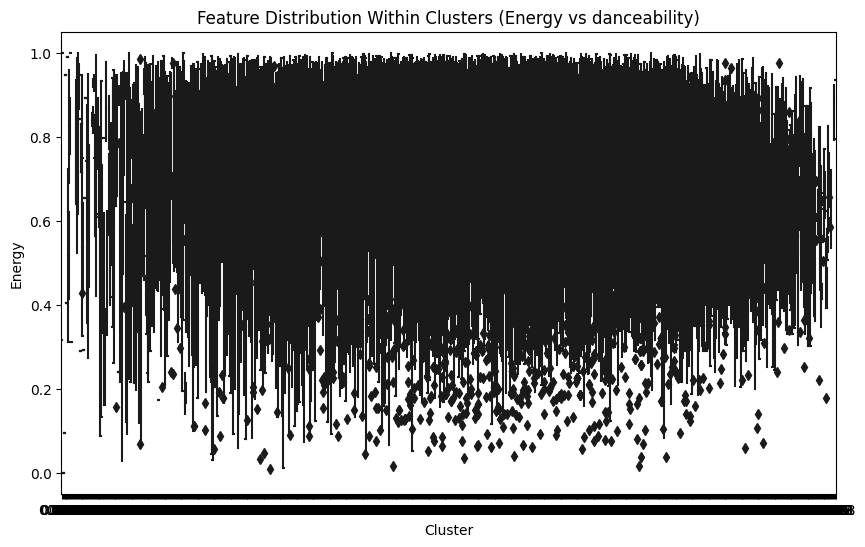

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='danceability', y='energy', palette='viridis')
plt.title('Feature Distribution Within Clusters (Energy vs danceability)')
plt.xlabel('Cluster')
plt.ylabel('Energy')
plt.show()

# **RECOMMENDATION SYSTEM MODEL**

In [42]:
def recommend_similar_tracks(track_id, cluster_label, n=5):
    similar_tracks = data[(data['genre_cluster'] == cluster_label) & (data['track_id'] != track_id)]
    similar_tracks = data[(data['genre_cluster'] == cluster_label) & (data['track_id'] != track_id)].copy()
    top_n_tracks = similar_tracks.sort_values(by='similarity').head(n)
    return top_n_tracks[['track_id', 'track_name', 'track_artist']]




In [47]:
track_id = '0r7CVbZTWZgbTCYdfa2P31'
cluster_label = data.loc[data['track_id'] == track_id, 'genre_cluster'].values[0]  
recommendations = recommend_similar_tracks(track_id, cluster_label)
print("Recommended Tracks:")
for index, row in recommendations.iterrows():
    print(f"Track ID: {row['track_id']}\nTrack Name: {row['track_name']}\nTrack Artist: {row['track_artist']}\n")



Recommended Tracks:
Track ID: 6f807x0ima9a1j3VPbc7VN
Track Name: I Don't Care (with Justin Bieber) - Loud Luxury Remix
Track Artist: Ed Sheeran

Track ID: 1z1Hg7Vb0AhHDiEmnDE79l
Track Name: All the Time - Don Diablo Remix
Track Artist: Zara Larsson

Track ID: 75FpbthrwQmzHlBJLuGdC7
Track Name: Call You Mine - Keanu Silva Remix
Track Artist: The Chainsmokers

Track ID: 1e8PAfcKUYoKkxPhrHqw4x
Track Name: Someone You Loved - Future Humans Remix
Track Artist: Lewis Capaldi

Track ID: 7fvUMiyapMsRRxr07cU8Ef
Track Name: Beautiful People (feat. Khalid) - Jack Wins Remix
Track Artist: Ed Sheeran



/tmp/ipykernel_34/3019499585.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_tracks['similarity'] = np.sqrt(np.square(similar_tracks['danceability'] - data.loc[data['track_id'] == track_id, 'danceability']) +
